In [4]:
# import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pca import pca
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_hdf('2_Cleaned_dataset/images.h5', key='data')
df.shape

(910, 11)

In [70]:
type(df[0:1].image[0])

numpy.ndarray

In [29]:
def get_dataset(column='image'):
    # Aplanamos las imágenes antes de crear una matriz de valores estandarizados
    X = np.stack(df[column].apply(lambda x: x.flatten()))
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Crea un DataFrame a partir de los datos escalados
    X_standardized_df = pd.DataFrame(X_standardized)

    pca_model = PCA(n_components=700)
    pca_model.fit(X_standardized_df)
    return pca_model.transform(X_standardized_df)

In [30]:
df_images = get_dataset()
df_images.shape

(910, 700)

In [76]:
type(df_images[0:1][0])

numpy.ndarray

In [100]:
len(df_images[0:1][0])

700

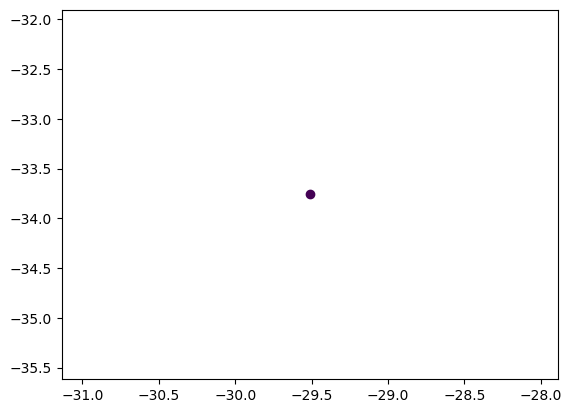

In [111]:
imagen_reducida = df_images[0:1]
dbscan = DBSCAN(eps=0.001, min_samples=1000, metric='cosine')
dbscan.fit(imagen_reducida)

# Visualizar los resultados
plt.scatter(imagen_reducida[:,0], imagen_reducida[:,1], c=dbscan.labels_)
plt.show()

In [90]:
image = df_images[0:1][0]

# Convierte la fila en un arreglo NumPy
X = image.reshape(-1, 1)

# Crea y ajusta el modelo DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10, metric='cosine')
clusters = dbscan.fit_predict(X)
clusters

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [112]:
len(clusters)

700

In [96]:
import matplotlib.pyplot as plt

# Resultados de DBSCAN
labels = clusters

# Crear una figura y ejes para el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Crear una máscara para puntos de ruido (etiqueta -1)
mask_noise = (labels == -1)

# Mostrar la imagen original en escala de grises
image = df_images[0:1][0].reshape(188, 398)
plt.imshow(image, cmap='gray')

# Colorear los puntos de ruido en rojo
image_with_noise = np.copy(image)
image_with_noise[mask_noise] = 255  # Colorea los puntos de ruido en blanco (255 en escala de grises)

# Mostrar la imagen con los puntos de ruido marcados en rojo
plt.imshow(image_with_noise, cmap='gray', alpha=0.7)

# Configurar título y leyendas
plt.title('Resultados de DBSCAN en la Imagen')
plt.colorbar(label='Etiquetas de Clústeres')
plt.xlabel('Columna')
plt.ylabel('Fila')

# Mostrar el gráfico
plt.show()


ValueError: cannot reshape array of size 700 into shape (188,398)

<Figure size 1000x600 with 0 Axes>

In [64]:
# Tomamos la primer imagen
sample_images = df_images[0:9]
#X = image.reshape(-1, 1)

# Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5000)
clusters = dbscan.fit_predict(sample_images)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import silhouette_score

# Crear un espacio de búsqueda de hiperparámetros
param_dist = {
    'eps': uniform(0.1, 10.0),        # Rango para eps
    'min_samples': randint(2, 100)    # Rango para min_samples
}

# Crear el modelo DBSCAN
dbscan = DBSCAN()

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    dbscan,              # Estimador
    param_distributions=param_dist,  # Espacio de búsqueda
    n_iter=1,           # Número de iteraciones aleatorias
    cv=5,                # Número de divisiones en la validación cruzada
    scoring=silhouette_score,  # Métrica de evaluación (puntuación de silueta)
    n_jobs=-1            # Utilizar todos los núcleos de la CPU para paralelizar
)

# Ajustar el modelo de búsqueda a tus datos
random_search.fit(image)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_dbscan = random_search.best_estimator_

# Mostrar los mejores resultados
print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación de silueta:", random_search.best_score_)



ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
# g = plt.scatter(X[:,0], X[:,1], c = clusters, alpha = 0.8)
# legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
# ax.add_artist(legend)
# plt.show()

# # # Identificar grupos y puntos ruidosos
# # areas_densas = caracteristicas[etiquetas != -1]
# # puntos_ruidosos = caracteristicas[etiquetas == -1]

# # # Visualizar las áreas densas en la imagen original
# # imagen_resultado = image.copy()
# # imagen_resultado[etiquetas == -1] = 0  # Establece puntos ruidosos como negro en la imagen resultado

# # # Mostrar la imagen original y la imagen con las áreas densas resaltadas
# # plt.figure(figsize=(10, 5))
# # plt.subplot(1, 2, 1)
# # plt.title("Imagen Original")
# # plt.imshow(image, cmap='gray')

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Supongamos que tienes tus datos en un arreglo X y has ajustado el modelo DBSCAN
# Como mencionaste en tu código anterior
# dbscan = DBSCAN(eps=5, min_samples=500)
# clusters = dbscan.fit_predict(X)

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(image[:, 0], image[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.8)

# Agregar etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Resultados del Clustering DBSCAN')

# Mostrar el gráfico
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

In [ ]:
# Cargar la imagen de radiografía dental (asegúrate de tener OpenCV instalado)
imagen = cv2.imread('radiografia_dental.jpg', 0)  # Carga la imagen en escala de grises

# Definir características (intensidad de píxeles)
caracteristicas = imagen.reshape(-1, 1)

# Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=5, min_samples=500)  # Ajusta los parámetros según tus necesidades
etiquetas = dbscan.fit_predict(caracteristicas)

# Identificar grupos y puntos ruidosos
areas_densas = caracteristicas[etiquetas != -1]
puntos_ruidosos = caracteristicas[etiquetas == -1]

# Visualizar las áreas densas en la imagen original
imagen_resultado = imagen.copy()
imagen_resultado[etiquetas == -1] = 0  # Establece puntos ruidosos como negro en la imagen resultado

# Mostrar la imagen original y la imagen con las áreas densas resaltadas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Áreas Densas Resaltadas")
plt.imshow(imagen_resultado, cmap='gray')

plt.tight_layout()
plt.show()